# **Семинар 11. Визуализация. `Matplotlib`**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

Визуализация занимает важную часть в анализе данных. Представляя информацию в графическом виде, вы облегчаете процесс ее восприятия, что дает возможность выделять дополнительные закономерности, оценивать соотношения величин, быстрее доносить ключевые аспекты в данных.

Начнем с небольшой "памятки", о которой всегда нужно помнить при создании любых графиков.

**Вредные советы**
1. **Заголовок** графика для слабаков. По графику всегда понятно, какие данные и явления он описывает.
2. Ни в коем случае не **подписывай** ни одной **оси** у графика. Пусть смотрящий развивает свою интуицую!
3. **Единицы измерения** совсем не обязательны. Какая разница, в чем измеряли количество - в людях или в литрах!
4. Чем меньше **шрифт** на графике, тем острее зрение смотрящего.
5. На одном графике нужно стараться уместить всю информацию, которая у тебя есть в датасете. С полными названиями, расшифровками, сносками. Чем больше текста - тем информативнее!
6. При любой возможности используйте 3D и спецэффекты, пусть знают, что ты — прирожденный дизайнер. К тому же, так будет меньше визуальных искажений.

Если серьезно, то обязательно посмотрите список рекомендованных материалов в конце ноутбука по правилам оформления графиков и работе с библиотеками для визуализации данных в Python.  

Основные библиотеки для визуализации в Python - это `matplotlib`, `seaborn`, `plotly`. В данном блокноте сосредоточимся на `matplotlib`

In [1]:
# раскомментируйте нужную строчку _-и) с отсутствующей библиотекой и установите ее
# !pip install plotly -q
# !pip install matplotlib -q
# !pip install seaborn -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Сегодня будем работать с датасетом, который содержит информацию о пациентах с диабетом

**Описание признаков датасета**
- **`age`** — возраст в годах.
- **`sex`** — пол.
- **`bmi`** — индекс массы тела.
- **`bp`** — среднее артериальное давление.
- **`tc`** — общий уровень сывороточного холестерина.
- **`ldl`** — липопротеины низкой плотности.
- **`hdl`** — липопротеины высокой плотности.
- **`tch`** — общий холестерин / **HDL**.
- **`ltg`** — логарифм уровня триглицеридов в сыворотке.
- **`glu`** — уровень сахара в крови.

In [3]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ksumarshmallow/Data-Analysis-Media-24/refs/heads/main/data/diabetes.csv')
diabetes.head()

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,59,male,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,female,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,male,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,female,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,female,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
diabetes.shape

(442, 11)

# Осматриваем датасет

In [5]:
# Проверим типы данных и наличие пропущенных значений
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  442 non-null    int64  
 1   SEX                  442 non-null    object 
 2   BMI                  442 non-null    float64
 3   BP                   442 non-null    float64
 4   tc                   442 non-null    int64  
 5   ldl                  442 non-null    float64
 6   hdl                  442 non-null    float64
 7   tch                  442 non-null    float64
 8   ltg                  442 non-null    float64
 9   glu                  442 non-null    int64  
 10  disease_progression  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


Супер, пропусков нет!

In [6]:
# Базовые статистики по числовым данным
diabetes.describe().round(2)

,AGE,BMI,BP,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


# Как выбрать нужный график?

Если вы хотите визуализировать ваши данные, но не знаете, какой тип графика выбрать, ознакомьтесь со шпаргалкой ниже. Графики могут быть выбраны в зависимости от типа данных и количества признаков.

1. **Круговая диаграмма (pie chart)**
   - **Тип данных:** Категориальные данные (или числовые дискретные)
   - **Количество признаков:** Один категориальный или числовой дискретный признак.
   - **Когда использовать:** Когда нужно показать соотношение категорий между собой.
   - **Пример:** Процентное распределение марок автомобилей на рынке.

2. **Столбчатая диаграмма (Bar plot)**
   - **Тип данных:** Категориальные данные или числовые дискретные (и дополнительно может быть еще числовой).
   - **Количество признаков:** Один категориальный или числовой дискретный признак. Может быть второй числовой признак (по оси OY)
   - **Когда использовать:** Когда нужно сравнить данные между категориями или показать распределение значений по категориям.
   - **Пример:** Количество покупок по дням недели.

3. **Гистограмма**
   - **Тип данных:** Числовые данные (непрерывные или дискретные)
   - **Количество признаков:** Один числовой признак
   - **Когда использовать:** Когда нужно визуализировать распределение данных
   - **Пример:** Распределение возрастов участников опроса

4. **Box plot (ящик-с-усами)**
   - **Тип данных:** Числовые данные
   - **Количество признаков:** Один числовой признак.
   - **Когда использовать:** Когда нужно показать статистическое распределение, включая медиану, квартили и выбросы.
   - **Пример:** Распределение зарплат в разных отраслях.

5. **График рассеяния (scatter plot)**
   - **Тип данных:** Числовые данные.
   - **Количество признаков:** Два числовых признака
   - **Когда использовать:** Когда нужно показать связь между двумя переменными и проверить наличие трендов или зависимостей.
   - **Пример:** Рост человека vs Вес человека.

6. **Линейный график**
   - **Тип данных:** Числовые данные (непрерывные)
   - **Количество признаков:** Два числовых признака (один может быть датой)
   - **Когда использовать:** Когда нужно показать зависимость между двумя переменными или тренды во времени (например, изменение температуры по дням, рост показателя за период времени).
   - **Пример:** Время vs Температура.

7. **Тепловая карта (Heatmap)**
   - **Тип данных:** Числовые данные (непрерывные).
   - **Количество признаков:** Два или больше признаков (обычно используется для матриц данных или корреляционных матриц).
   - **Когда использовать:** Когда нужно показать взаимодействие между несколькими признаками или визуализировать корреляцию между переменными.
   - **Пример:** Корреляция между различными характеристиками (например, высота, вес, возраст).

**Summary**

| Тип данных / Признак       | Один признак                        | Два признака                         | Несколько признаков               |
|---------------------------|-------------------------------------|--------------------------------------|----------------------------------|
| **Числовой дискретный**    | Гистограмма, Box plot              | Диаграмма рассеяния, Линейный график | Тепловая карта                   |
| **Числовой непрерывный**   | Гистограмма, Box plot | Диаграмма рассеяния, Линейный график | Тепловая карта                   |
| **Категориальный**         | Круговая диаграмма, Столбчатая диаграмма | Нет | Тепловая карта (если несколько категорий и признаков) |

---

# Визуализация с `matplotlib`

Обусловимся, что импортироваали matplotlib.pyplot как `plt`. Основные типы графиков и синтаксис в matplotlib такой:

| Тип графика                 | Синтаксис matplotlib                                                                 |
|-----------------------------|--------------------------------------------------------------------------------|
| **Линейный график**          | `plt.plot(x, y)`                                                               |
| **Столбчатая диаграмма**     | `plt.bar(categories, values)`                                                   |
| **Гистограмма**             | `plt.hist(x)`                                     |
| **Круговая диаграмма**      | `plt.pie(sizes, labels=labels)`                             |
| **График рассеяния**         | `plt.scatter(x, y)`                                                            |
| **Ящик-с-усами**    | `plt.boxplot(x)`                                                             |


## 1. Basics

Но на данном семинаре мы сосредоточимся на том, как сделать графики красивое. Начнем с обычной **гистограммы** - построим распределение возраста пациентов (`AGE`)

In [7]:
diabetes.head()

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,59,male,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,female,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,male,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,female,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,female,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


(array([19., 28., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([19., 25., 31., 37., 43., 49., 55., 61., 67., 73., 79.]),
 <BarContainer object of 10 artists>)

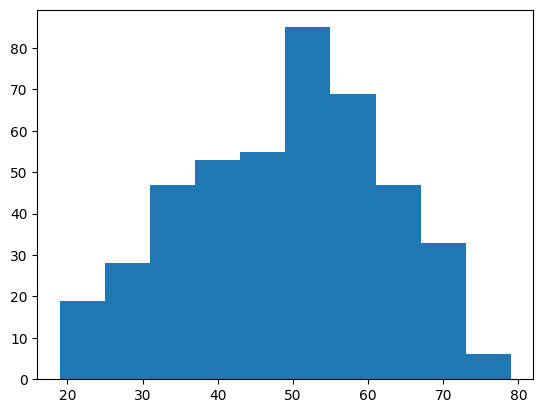

In [8]:
# В качестве аргумента должны передать вектор с числами. В нашем случае - просто передаем столбец Age
plt.hist(diabetes['AGE'])

### Подписи

Выглядит, если честно, так себе. Если посмотреть на этот график вне контекста - вообще не понятно, что он значит. Внесем ясности в график:
1. Добавим заголовок: `plt.title(...)`
2. Подпишем ось OX: `plt.xlabel(...)`
3. Подпишем ось OY: `plt.ylabel(...)`

И в дополнение избавимся от ненужного текста, который выводит юпитер:
- Либо после отрисовки графика пишем `plt.show()`
- Либо на последней строчке с отрисовкой графика ставим точку с запятой (`;`)

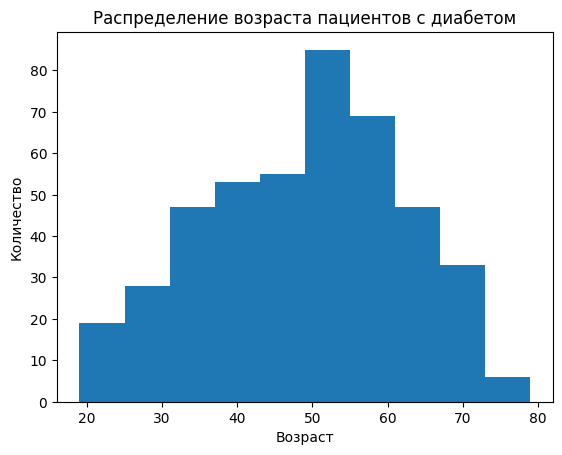

In [9]:
plt.hist(diabetes['AGE'])
plt.title('Распределение возраста пациентов с диабетом')
plt.xlabel('Возраст')
plt.ylabel('Количество');

Кастом подписей в в `plt.title`, `plt.xlabel()` и `plt.ylabel()`:
- **Размер подписей**: параметр `fontsize`. По умолчанию = 10.
- **Тип шрифта**: параметр `family` - из значений {'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif'}
- **Насыщенность шрифта**: параметр `fontweight`. Из значений {‘ultralight’, ‘light’, ‘normal’, ‘regular’, ‘book’, ‘medium’, ‘roman’, ‘semibold’, ‘demibold’, ‘demi’, ‘bold’, ‘heavy’, ‘extra bold’, ‘black’}. Либо численное в диапазоне 0-1000

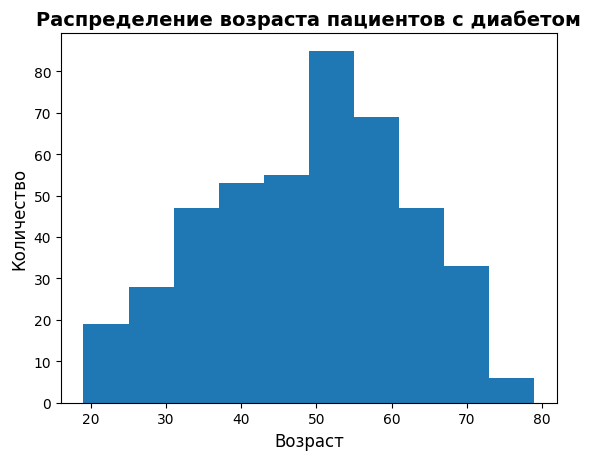

In [10]:
plt.hist(diabetes['AGE'])
plt.title('Распределение возраста пациентов с диабетом', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12);

### Размер и четкость графика
Данную конструкцию пишут **перед** построением графика

```python
plt.figure(figsize=(width, height), dpi=n)
```
- `width` и `height` - регулируют размеры графика
- `dpi` - регулирует четкость графика


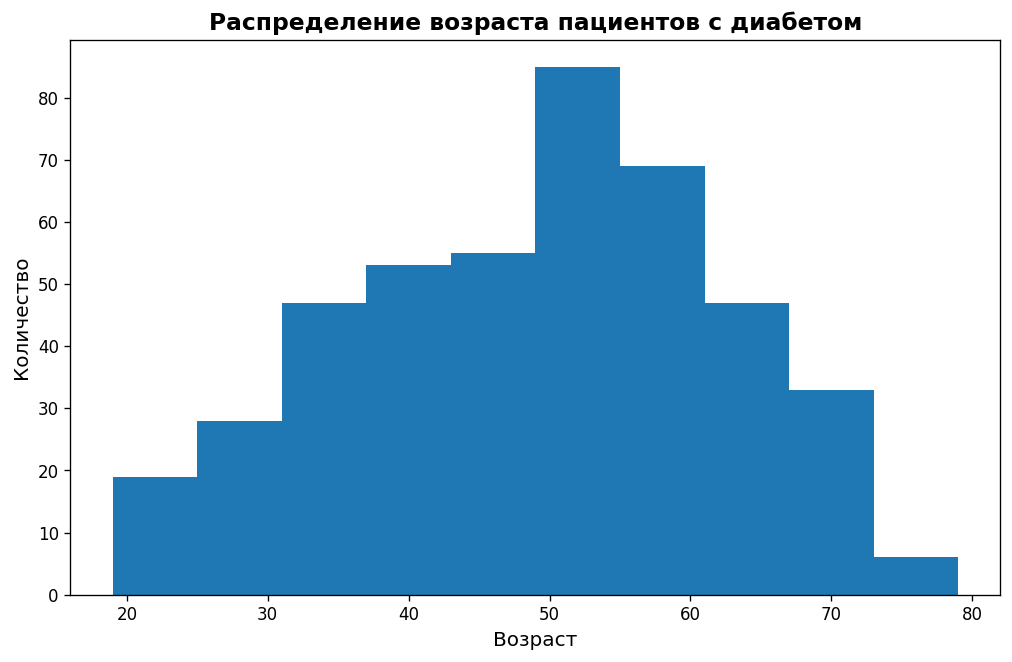

In [11]:
plt.figure(figsize=(10, 6), dpi=120)

plt.hist(diabetes['AGE'])
plt.title('Распределение возраста пациентов с диабетом', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12);

### Отметки по оси OX и OY
Их тоже можно регулировать - с помощью параметров внутри `plt.xticks()` или `plt.yticks()`:

- `rotation` - задает поворот меток (указываем в градусах). Н-р при rotation=90 станут повернуты на 90 градусов
- `fontsize` - размер меток
- `color` - цвет меток. В секции ниже будет ссылка на все цвета в python (либо можете загуглить)

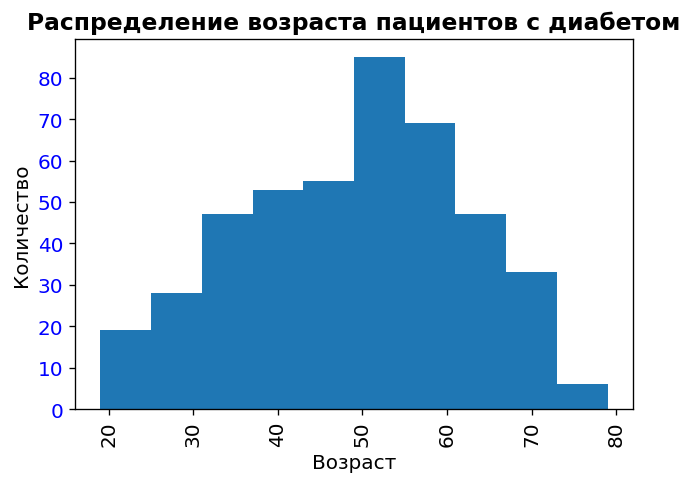

In [12]:
plt.figure(figsize=(6, 4), dpi=120) # сделаем чуть поменьше график

plt.hist(diabetes['AGE'])

plt.title('Распределение возраста пациентов с диабетом', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12);

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12, color='blue')

plt.show()

## 2. Параметры графика

### Гистограмма

С надстройкой над графиком поигрались, но сама гистограмма выглядит как-то непривлекательно. Теперь можно поиграться со следующими параметрами, уже в функции отрисовки гистограммы `plt.hist()`:
- `bins` - параметр, отвечающий за количество бинов (интервалов, на которые разбивается непрерывная переменная). Если указать `bins=1` все данные сольются в дону корзину, и вы просто увидите закраженную цветом ячейку
- `color` - цвет гистограммы. Все доступные цвета можно или загуглить, или посмотреть по [ссылке](https://www.plus2net.com/python/tkinter-colors.php). Можно приводить и в RGB-формате
- `linewidth` -толщина линий, "окружающих" столбики гистограммы
- `edgecolor` - цвет границ каждого столбика (по умолчанию его нет - не идим разделения между столбиками). 
- `alpha` - прозрачность графика. Значение варьируется от 0 (полностью прозрачно) до 1 (полностью непрозрачно). Например, `alpha=0.5` придаст полупрозрачность вашей гистограмме.

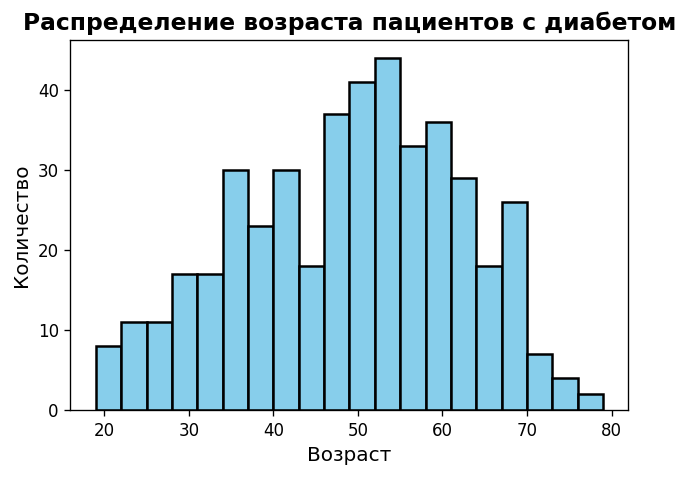

In [13]:
plt.figure(figsize=(6, 4), dpi=120)

plt.hist(x=diabetes['AGE'],
         bins=20,           # Разбиваем данные на 20 интервалов
         color='skyblue',
         linewidth=1.5,     # Устанавливаем ширину "обводки" графика
         edgecolor='black', # Делаем обводку черным цветом
        #  alpha=0.8        # Можем сделать прозрачность, но здесь это не нужно
         )

plt.title('Распределение возраста пациентов с диабетом', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12);

plt.show()

### Диаграмма рассеяния

Синтаксис:
```python
    plt.scatter(x, y)
```

`x` и `y` - любые числовые столбцы (`data['числовой признак]`)

Построим диаграмму рассеяния - зависимость артериального давления (`BP`) от ИМТ пациента (`BMI`). Сразу сделаем "обертку" - подпишем график, оси и изменим размеры.

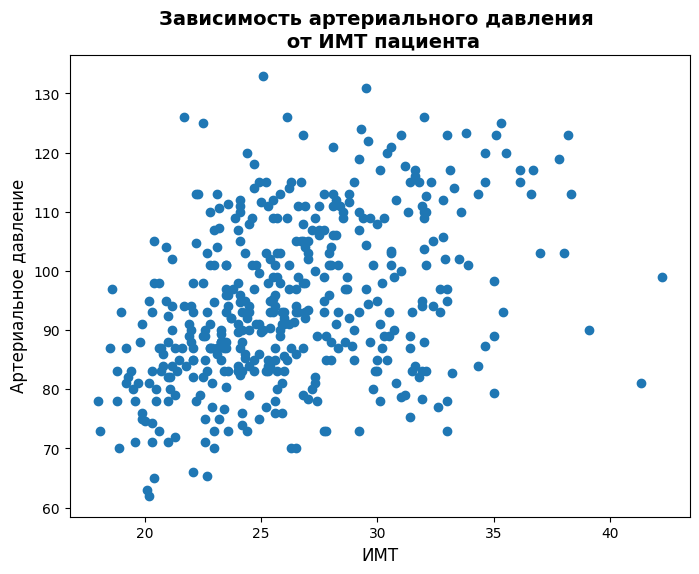

In [14]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(diabetes['BMI'], diabetes['BP'])

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)
plt.show()

Теперь кастомизируем график рассеяния. Многие параметры являются **общими** для всех графиков в `matplotlib`:
- `color` - цвет
- `alpha` - прозрачность
- `edgecolors` и `linewidth` - цвет и размер обводки вокруг точек
- `s` - размер точек (по умолчанию `s=20`)
- `marker` - если вместо точки хотите что-то другое (треугольник, крестик и т.п.). Возможные значения лучше посмотрите по [ссылке](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

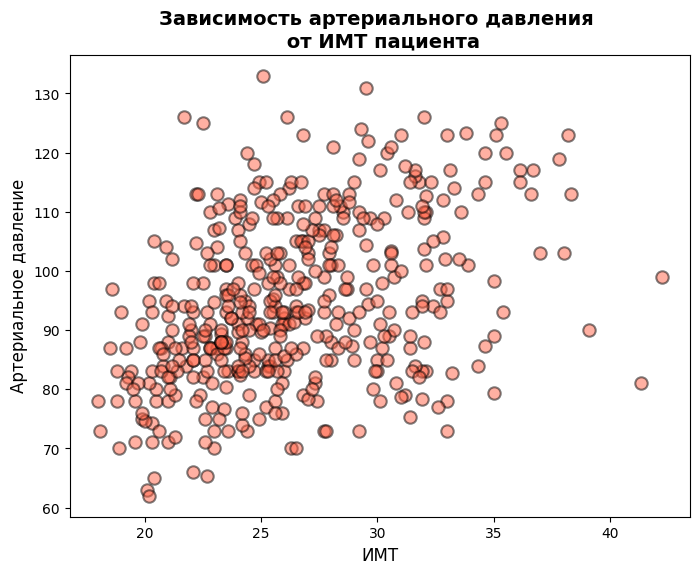

In [15]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(x=diabetes['BMI'], y=diabetes['BP'],
            color='tomato',
            linewidth=1.5, edgecolor='black',
            s=80,
            alpha=0.5)

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)
plt.show()

Интересный момент - в качестве `s` можно передавать не просто цифру, но и вектор (столбец из таблицы)! Это означает, что для каждой точки можно сделать свой размер.

Давайте попробуем сделать размер точек в зависимости от значений степени прогрессии диабета (`disease_progression`)

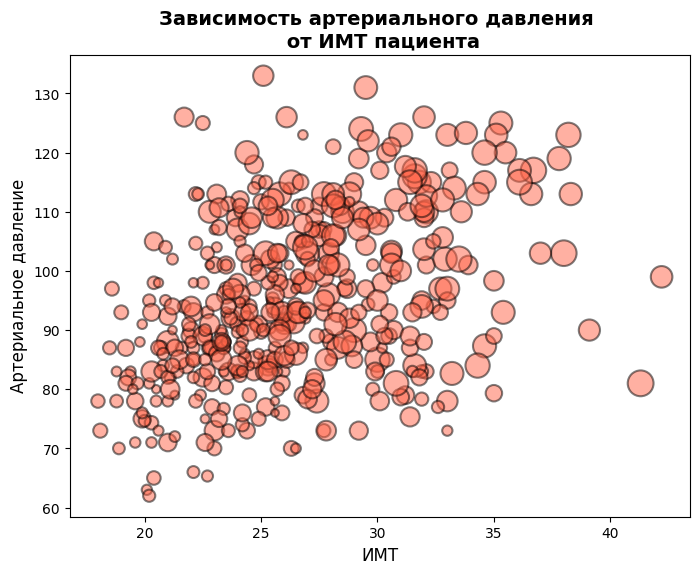

In [16]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(x=diabetes['BMI'], y=diabetes['BP'],
            color='tomato',
            linewidth=1.5, edgecolor='black',
            s=diabetes['disease_progression'],
            alpha=0.5)

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)
plt.show()

Цвет можно сделать также вектором! Давайте покрасим точки в зависимости от уровня липопротеинов высокой плотности (`hdl`). Только его нужно передавать параметру `c` (а не colors, как ранее)

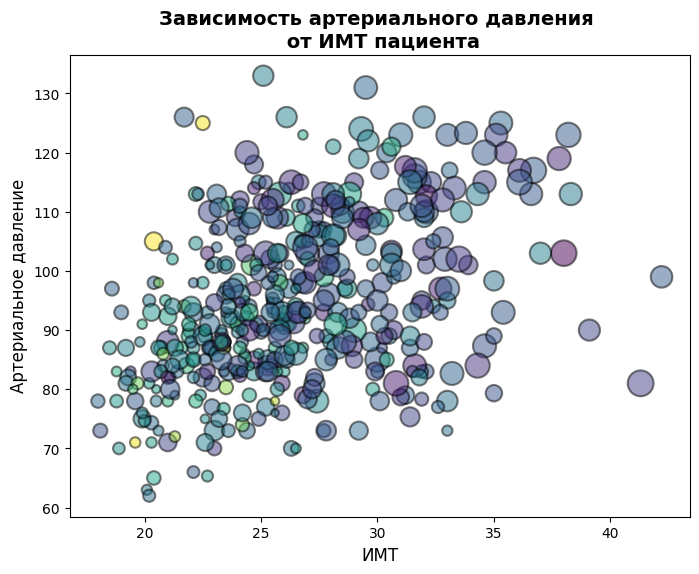

In [17]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(x=diabetes['BMI'], y=diabetes['BP'],
            c=diabetes['hdl'],
            linewidth=1.5, edgecolor='black',
            s=diabetes['disease_progression'],
            alpha=0.5)

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)
plt.show()

Осталось узнать, что значит какой цвет. Для этого нужно вызвать `plt.colorbar()` после построения графика и перед его отображением с `plt.show()` (или `;`). Также можем поменять цветовую шкалу с помощью аргумента `cmap`.

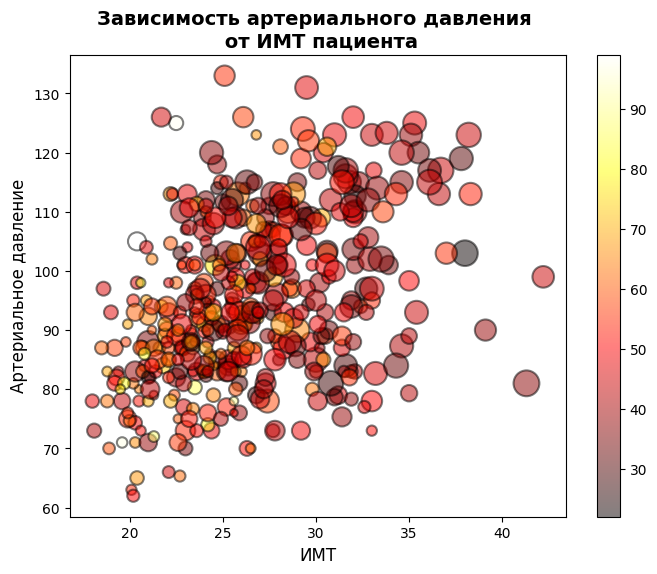

In [18]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(x=diabetes['BMI'], y=diabetes['BP'],
            c=diabetes['hdl'], cmap='hot',  #  добавили cmap
            linewidth=1.5, edgecolor='black',
            s=diabetes['disease_progression'],
            alpha=0.5)

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)

plt.colorbar()

plt.show()

### Круговая диаграмма

**Синтаксис**
```python
plt.pie(values, labels='подписи соответствующих значений', colors=['цвет-1', 'цвет-2', ...])
```

- В качестве `values` должны передавать частоты (количество) строк. 
- В качестве `labels` - соответствующие категории. Это все можно взять из частотной таблицы по категориальному столбцу (значения и индексы, соответственно)
- `autopct='%.1f%%'` - отображение процентного содержания каждой категории. В данном случае - с точностью до одного знака после запятой.
- `shadow` - показывает тень на графике
- `pctdistance` - позиция отображения процентов (из `autopct`). Варьируется от 0 до 1. 0 - в центре, 1 - на краю пирога
- `explode` - если хотим "вытащить" какие-то категории из пирога. Нужно передать список из размеров "выдвижения" каждой категории (в порядке, соответствующим labels)

Нарисуем распределение пациентов по полу (`SEX`)

In [19]:
diabetes['SEX'].value_counts()

SEX
female    235
male      207
Name: count, dtype: int64

У нас только две категории, поэтому передаем только два цвета. Также применим базовые обертки (подписи и прочее)

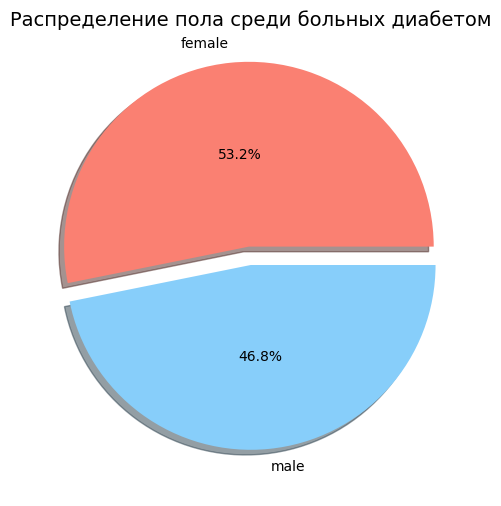

In [20]:
plt.figure(figsize=(8, 6), dpi=100)

# Сохраняем частотную таблицу в отдельную переменную
sex_diabetes = diabetes['SEX'].value_counts()

# На первом месте в .pie() - значения (доли). В качестве labels - названия категорий
plt.pie(sex_diabetes.values, 
        labels=sex_diabetes.index, 
        colors=['salmon', 'lightskyblue'], 
        autopct='%.1f%%',       # Отображаем доли категорий в % с точностью до 1 знака
        pctdistance=0.5,        # Позиция процентов,
        shadow=True,            # Добавляем тень для эффекта объемности
        explode=(0.1, 0)        # "Выдуваем" один сектор для выделения (выделяется первый сектор)
        )

plt.title('Распределение пола среди больных диабетом', fontsize=14)
plt.show()

Есть еще совсем high-level редактирование, но такие вещи обычно просто гуглят :)
- `wedgeprops` - позволяет редактировать цвет (`edgecolor`) и ширину (`linewidts`) обводки всего в pie-chart. Параметры те же, но передаются в виде словаря (пример ниже)
- `textprops` - редактируем текст на круговой диаграмме (проценты и названия категорий). Из параметров все то же, что и применялось для `plt.title()` и т.п.

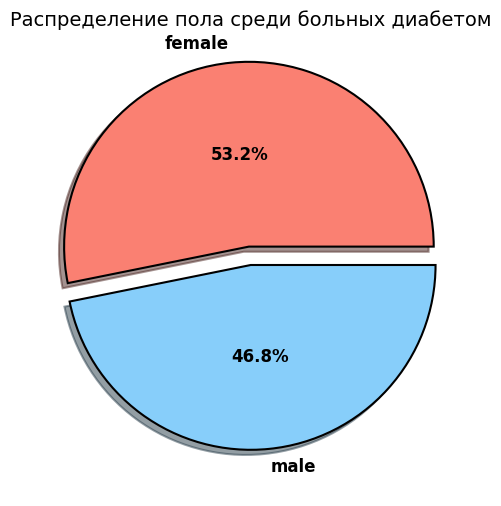

In [21]:
plt.figure(figsize=(8, 6), dpi=100)

# Сохраняем частотную таблицу в отдельную переменную
sex_diabetes = diabetes['SEX'].value_counts()

# На первом месте в .pie() - значения (доли). В качестве labels - названия категорий
plt.pie(sex_diabetes.values, 
        labels=sex_diabetes.index, 
        colors=['salmon', 'lightskyblue'], 
        autopct='%.1f%%',       # Отображаем доли категорий в % с точностью до 1 знака
        pctdistance=0.5,        # Позиция процентов,
        shadow=True,            # Добавляем тень для эффекта объемности
        explode=(0.1, 0),        # "Выдуваем" один сектор для выделения (выделяется первый сектор).
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},    # Черная обводка для секторов с шириной линии 0.5
        textprops={'fontsize': 12, 'fontweight': 'bold'}        # Стиль текста
        )

plt.title('Распределение пола среди больных диабетом', fontsize=14)
plt.show()

### Столбчатая диаграмма
Столбчатая диаграмма - еще один способ представить категориальные данные.

**Синтаксис**
```python
plt.bar(x=categories, height=values)
```
- `categories` - наименования категорий
- `values` - высота столбика, т.е. значения, которые хотим отобразить для каждой категории (высот). Нпример, можно брать частоту из частотной таблицы

Также есть параметры, характерные для других графиков: 
- `color` - строка (один цвет) или список цветов (для каждого столбика) 
- `edgecolor` - границы столбиков

Создадим новый признак - характеристика систолического артериального давления (`BP`) согласно критериям ВОЗ:
- Пониженное давление: `BP < 80` мм. рт. ст.
- Нормальное давление: `BP ~ 80- 120` мм рт. ст.
- Повышенное давление (Прегипертензия): `BP ~ 120–139` мм рт. ст.
- Гипертензия 1 степени: `BP ~ 140-159` мм рт. ст.
- Гипертензия 2 степени: `BP ~ 160-180` мм рт. ст.
- Гипертензия 3 степени: `BP > 180` мм рт. ст.

In [22]:
def bp_coded(bp):
    if bp < 80:
        return 'low'
    elif 80 <= bp < 120:
        return 'normal'
    elif 120 <= bp < 140:
        return 'prehypertension'
    elif 140 <= bp < 160:
        return 'hypertension_1'
    elif 160 <= bp < 180:
        return 'hypertension_2'
    elif bp > 180:
        return 'hypertension_3'
    else:
        return None

In [23]:
diabetes['BP_coded'] = diabetes['BP'].apply(bp_coded)

In [24]:
diabetes['BP_coded'].value_counts()

BP_coded
normal             363
low                 58
prehypertension     21
Name: count, dtype: int64

И нарисуем столбчатую диаграмму по данному признаку

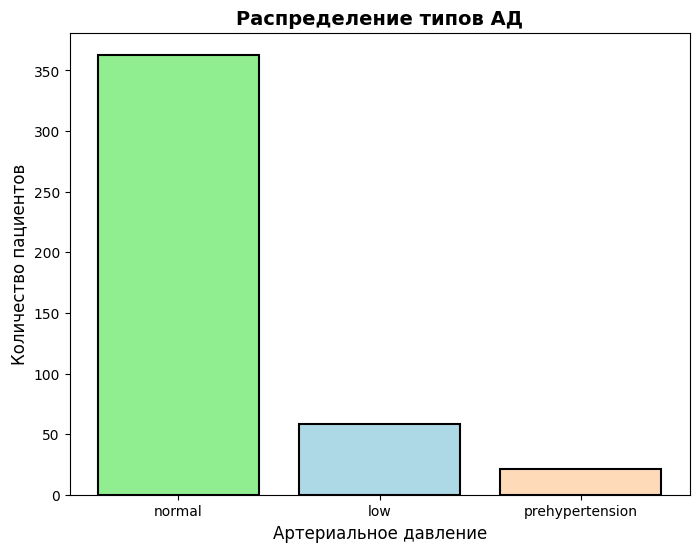

In [25]:
plt.figure(figsize=(8, 6), dpi=100)

# считаем частоты для каждой категории
bp_counts = diabetes['BP_coded'].value_counts()

plt.bar(bp_counts.index, 
        bp_counts.values, 
        color=['lightgreen', 'lightblue', 'peachpuff'],
        edgecolor='black',
        linewidth=1.5
        )

plt.title('Распределение типов АД', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Артериальное давление', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)

plt.show()


По оси OY можно отображать не только частоты. Например, можно отобразить средний ИМТ для каждой группы в артериальном давлении. Для этого применим **группировку**:

In [26]:
diabetes.groupby('BP_coded')['BMI'].mean()

BP_coded
low                24.239655
normal             26.500275
prehypertension    30.123810
Name: BMI, dtype: float64

И теперь нарисуем гистограмму для этого

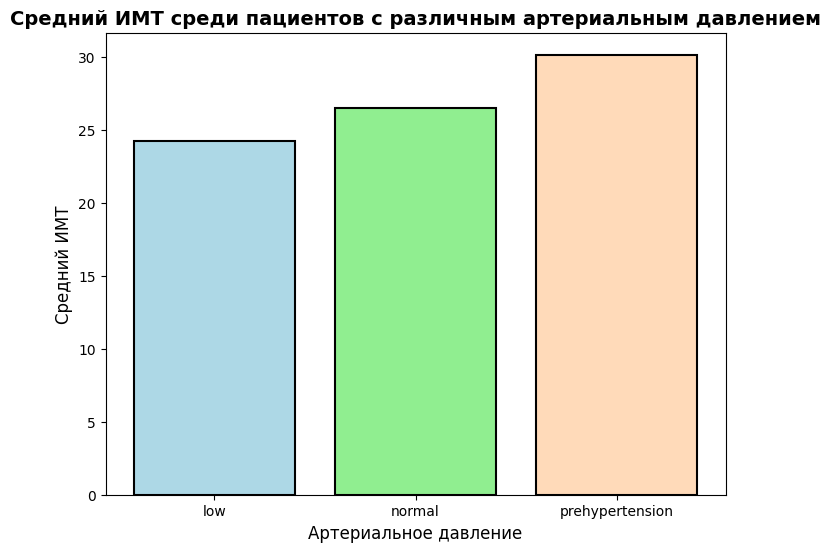

In [27]:
plt.figure(figsize=(8, 6), dpi=100)

# считаем средний ИМТ для каждой категории АД
grade_counts = diabetes.groupby('BP_coded')['BMI'].mean()

plt.bar(grade_counts.index, 
        grade_counts.values, 
        color=['lightblue', 'lightgreen', 'peachpuff'],
        edgecolor='black',
        linewidth=1.5
        )

plt.title('Средний ИМТ среди пациентов с различным артериальным давлением', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('Артериальное давление', fontsize=12)
plt.ylabel('Средний ИМТ', fontsize=12)

plt.show()


### Линейный график
Линейный график лучше всего подходит для отображения динамики чего-либо - то есть нужны даты. Поэтому возьмем другой датасет, где есть временная составляющая.

**Описание COVID-19 Dataset**
- `Date`: The date of the record.
- `Country_Region`: The name of the country/region.
- `-alpha-3_code`: country code for that can be used for map visualization.
- `Population`: The population of the given country/region.
- `Total_Confirmed_Cases`: Cumulative confirmed cases.
- `Total_Fatalities`: Cumulative fatalities.
- `Total_Recovered_Cases`: Cumulative recovered cases.
- `New_Confirmed_Cases`: Daily new confirmed cases.
- `New_Fatalities`: Daily new fatalities.
- `New_Recovered_Cases`: Daily new recovered cases.
- `Remaining_Confirmed_Cases`: Remaining infected cases which equal to (cumulative confirmed cases - cumulative recovered cases - cumulative fatalities).

In [28]:
covid = pd.read_csv('https://raw.githubusercontent.com/ksumarshmallow/Data-Analysis-Media-24/refs/heads/main/data/covid.csv')
covid.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0


In [29]:
# чекаем на пропуски
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70464 entries, 0 to 70463
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       70464 non-null  object
 1   Country_Region             70464 non-null  object
 2   alpha-3_code               68629 non-null  object
 3   Population                 70464 non-null  int64 
 4   Total_Confirmed_Cases      70464 non-null  int64 
 5   Total_Fatalities           70464 non-null  int64 
 6   Total_Recovered_Cases      70464 non-null  int64 
 7   New_Confirmed_Cases        70464 non-null  int64 
 8   New_Fatalities             70464 non-null  int64 
 9   New_Recovered_Cases        70464 non-null  int64 
 10  Remaining_Confirmed_Cases  70464 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.9+ MB


Для некоторых стран нет трехбуквенного обозначения. Заполним эти пропуски значениями `Country_Region`

In [30]:
covid['alpha-3_code'].fillna(
    covid[covid['alpha-3_code'].isna()].Country_Region,   # делаем фильтрацию по пропущенным значениям в alpha-3-code и вытаскиваем из них Country_Region
    inplace=True        # применяем к текущему датасету
)

/tmp/ipykernel_3616580/1246938594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid['alpha-3_code'].fillna(


In [31]:
covid.isna().sum()

Date                         0
Country_Region               0
alpha-3_code                 0
Population                   0
Total_Confirmed_Cases        0
Total_Fatalities             0
Total_Recovered_Cases        0
New_Confirmed_Cases          0
New_Fatalities               0
New_Recovered_Cases          0
Remaining_Confirmed_Cases    0
dtype: int64

**Синтаксис линейного графика**
```python
plt.plot(x, y)
```

- `x` - значения, зависимость от чего хотим посмотреть (вектор или столбец из датасета). У нас это даты
- `y` - значения, зависимость чего хотим посмотреть. В случае с датами - динамику чего хотим отследить

Продемонстрируем ежедневную динамику новых подтвержденных случаев (`New_Confirmed_Cases`)  в России (`Country_Region` - Russia)

In [32]:
#  фильтрация
covid_rus = covid[covid['Country_Region'] == 'Russia']
covid_rus.shape

(367, 11)

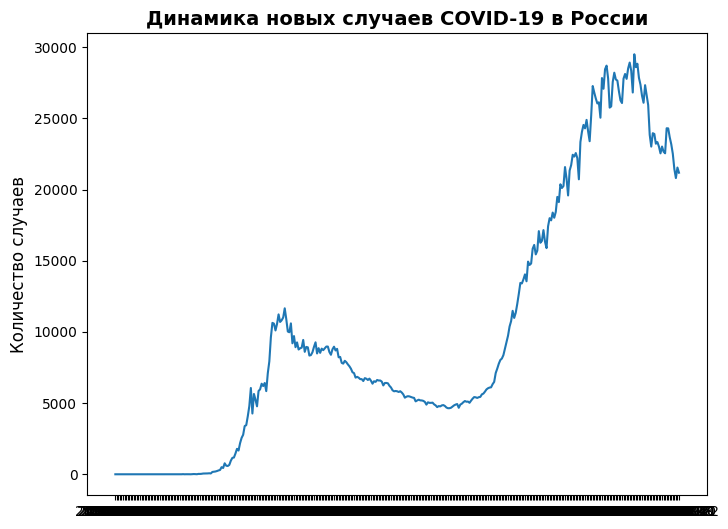

In [33]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'])

plt.title('Динамика новых случаев COVID-19 в России', fontsize=14, family='sans-serif', fontweight='bold')
plt.ylabel('Количество случаев', fontsize=12)

plt.show()

Упс, даты как-то плохо отображаются по оси OX. Это можно исправить, отрегулировав `xticks()`. Ему можно задать параметр `ticks` - и передать в него те метки, которые хотим видеть по OX. Так, мы можем взять просто каждую  $i$-ю метку из исходных данных

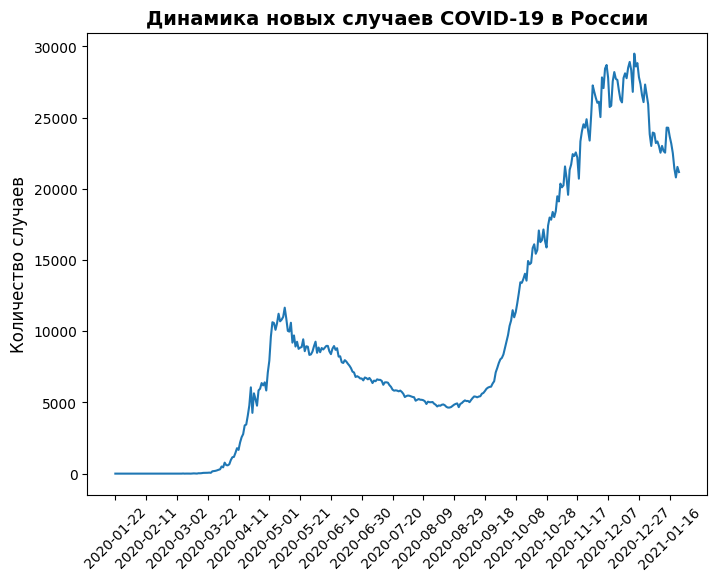

In [34]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'])

plt.title('Динамика новых случаев COVID-19 в России', fontsize=14, family='sans-serif', fontweight='bold')
plt.ylabel('Количество случаев', fontsize=12)

# Возьмем срез по датам с шагом 100 - отображаем каждую 100-ю дату. И поворачиваем на 45 градусов
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.show()

**Параметры линейного графика**
- `lw` - толщина линии. По умолчанию 1
- `ls` - формат линии. Возможные значения: `'-'`,  `'--'`, `'-.'`, `':'`, `''`
- `linestyle` - также формат линии (то же самое, что и ls, просто другие значения параметров для тех же самых линий). Возможные значения (соответственно): `Solid`, `Dashed`, `Dotted`, `Dashdot`, `None`
- `color` - цвет, как и для других графиков
- `alpha` - прозрачность, как и для других графиков


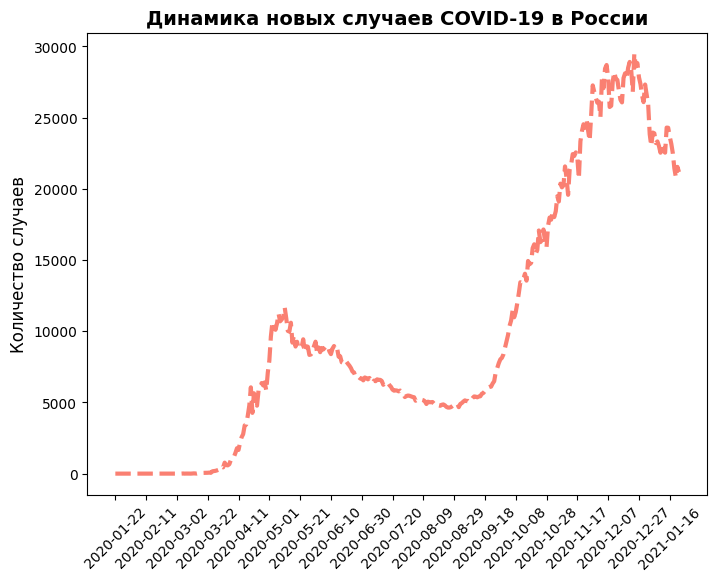

In [35]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'],
         lw = 3,                # изменяем толщину линии
         ls = '--',             # рисуем пунктиром
         color='salmon',
         )

plt.title('Динамика новых случаев COVID-19 в России', fontsize=14, family='sans-serif', fontweight='bold')
plt.ylabel('Количество случаев', fontsize=12)
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.show()

## 3. Несколько графиков

### Несколько графиков внутри одного блока

Иногда для наглядного сравнения двух или более зависимостей удобно разместить несколько графиков на одной области (оси). В matplotlib это делается с помощью повторного вызова функции построения, например, `plt.plot()` для линейных графиков, перед вызовом `plt.show()`.

**Основные моменты**:
1. **Добавление графиков**. Каждый вызов `plt.plot()` (или любых других типов графиков) добавляет новый график в текущую область построения. Параметры (цвет, стиль линии, метки и т.д.) задаются индивидуально для каждого графика.

2. **Легенда**. Чтобы различать графики, добавляйте параметры `label='название графика'` в функции `plt.plot()` и вызывайте `plt.legend()` после всех построений.

**Легенда** — это небольшой пояснительный блок на графике, который помогает понять, что означают разные линии, столбики, точки или другие элементы. Если у вас на одном графике несколько серий данных (например, данные о разных странах, группах людей или временных периодах), легенда объясняет, какой элемент к чему относится.

3. **Цвета и стили**. Используйте разные цвета, стили линий или маркеры для каждого графика, чтобы они не сливались визуально.

Давайте дополним предыдущий линейный график - помимо новых случаев COVID-19 в России добавим еще и по Германии. Отменим все равзными цветами и маркерами

In [38]:
covid_germany = covid[covid['Country_Region'] == 'Germany']

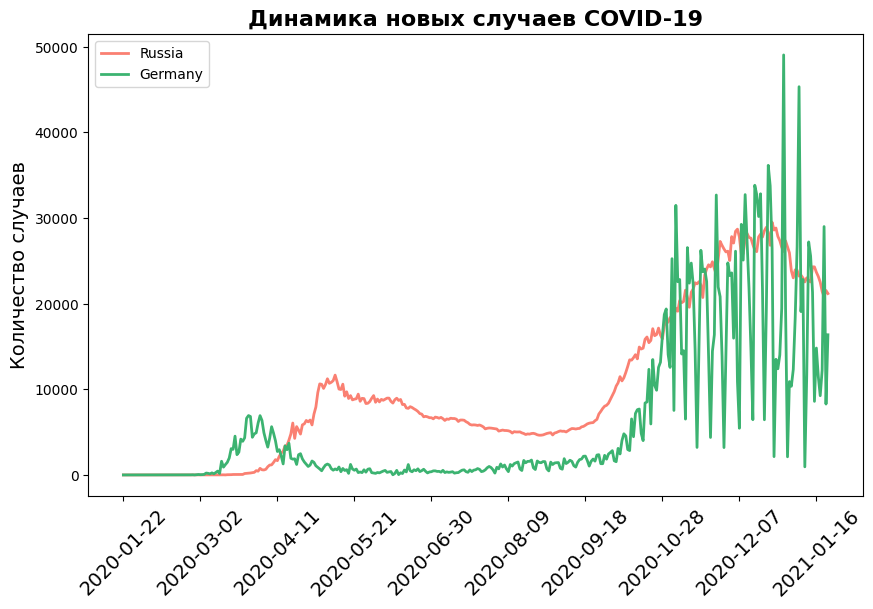

In [39]:
plt.figure(figsize=(10, 6), dpi=100)

# Для каждой страны задаем свой label - будет отображаться в легенде
# А также задаем свой цвет и / или linestyle
plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'], lw=2, color='salmon', label='Russia')
plt.plot(covid_germany['Date'], covid_germany['New_Confirmed_Cases'],  lw=2, color='mediumseagreen', label='Germany')

plt.title('Динамика новых случаев COVID-19', fontsize=16, family='sans-serif', fontweight='bold')
plt.ylabel('Количество случаев', fontsize=14)
plt.xticks(ticks=covid_rus['Date'][::40], rotation=45, fontsize=14)

# То, что было написано в label=... - отобразиться в легенде. Это отдельное окошко на графике
plt.legend()

plt.show()

### Регулировка легенды

В `plt.legend()` есть несколько параметров:
- `loc` - расположение легенды. 
    - 'best' (по умолчанию) - автоматический выбор оптимального расположения.
    - `upper right', 'upper left', 'lower right', 'lower left': в каком-то из углов графика.
    - 'center': центр графика.
    - 'center right', 'center left': по центру справа или слева.
- `fontsize` - размер шрифта
- `title` и `title_fontsize` — заголовок для легенды (название и размер шрифта этого названия)
- `frameon` и `framealpha` — рамка легенды:
    - `frameon=True` (по умолчанию): легенда с рамкой.
    - `framealpha` - прозрачность рамки (0 - прозрачная, 1 - вообще не прозрачная)
- `shadow` - тень под легендой
- `ncol` - количество колонок в легенде. По умолчанию 1

Обычно из них пользуются только теми, что связано с размером и расположением :) 

Кастомизируем же нашу легенду!

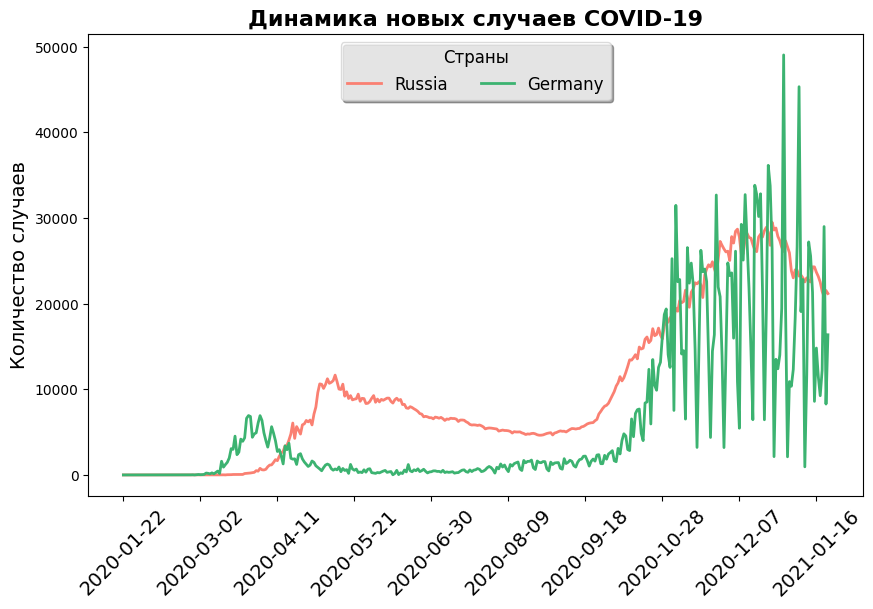

In [40]:
plt.figure(figsize=(10, 6), dpi=100)

# Для каждой страны задаем свой label - будет отображаться в легенде
# А также задаем свой цвет и / или linestyle

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'], lw=2, color='salmon', label='Russia')
plt.plot(covid_germany['Date'], covid_germany['New_Confirmed_Cases'],  lw=2, color='mediumseagreen', label='Germany')

# Не забываем подписывать
plt.title('Динамика новых случаев COVID-19', fontsize=16, family='sans-serif', fontweight='bold')
plt.ylabel('Количество случаев', fontsize=14)
plt.xticks(ticks=covid_rus['Date'][::40], rotation=45, fontsize=14)

plt.legend(
    loc='upper center',         # Центр сверху угол
    fontsize=12,                # Размер шрифта
    title='Страны',             # Заголовок легенды
    title_fontsize=12,          # Размер заголовка легенды
    frameon=True,               # С рамкой
    framealpha=0.7,             # Полупрозрачная рамка
    shadow=True,                # С тенью
    ncol=2                      # Две колонки
)

plt.show()

Вместе можно рисовать не только одинаковые типы графиков, но и разные. Например, можно нарисовать график рассеяния совместно с линейным графиком

**Линейная регрессия + график рассеяния**

Построим линейную регрессию - попытаемся предсказать ИМТ пациента (`BMI`) по его уровню артериального давления (`BP`)

In [44]:
import statsmodels.api as sm

X = sm.add_constant(diabetes['BP'])
Y = diabetes['BMI']

model = sm.OLS(Y, X).fit()

Y_pred = model.predict(X)

- Для scatterplot: график рассеяния для реальных данных
- Для линейного графика: в качестве OY будет выступать предсказанное значение целевой переменной

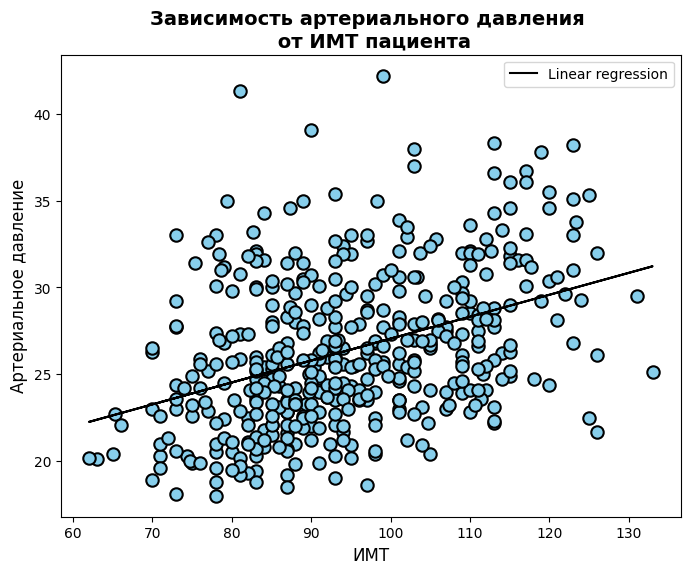

In [50]:
plt.figure(figsize=(8, 6), dpi=100)

# График рассеяния реальных данных
plt.scatter(x=diabetes['BP'], y=diabetes['BMI'],
            linewidth=1.5, 
            color='skyblue',
            edgecolor='black',
            s=80)

# Линейная регрессия - по OY будет предсказанное значение
# в легенду добавляем, что это уравнение линейной регрессии
plt.plot(diabetes['BP'], Y_pred, 
         color='k', 
         label='Linear regression'
         )

plt.title('Зависимость артериального давления \n от ИМТ пациента', fontsize=14, family='sans-serif', fontweight='bold')
plt.xlabel('ИМТ', fontsize=12)
plt.ylabel('Артериальное давление', fontsize=12)

plt.legend()
plt.show()

### Несколько графиков в разных окнах - метод `subplots`

В идеальной вселенной мы создаем графики функцией `subplots`, которая генерирует наш график в 2 переменные (обычно их называют fig и ax):

* `fig` отвечает за график в целом. Воспринимайте ее как файл, который хранит график как картинку
* `ax` $-$ это ось координат, на которой мы собственно строим график. Все элементы графика хранятся как раз в ней

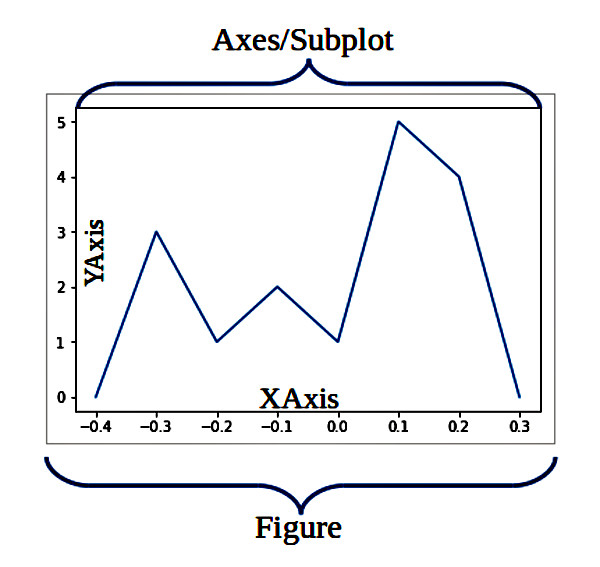

**Базовый дизайн с `subplots`**:

Начало работы:
```python
fig, ax = plt.subplots(x, y)
```
- `x` - число подграфиков на OX, 
- `y` - число подграфиков на OY
- Также принимает `figsize=(width, height)`
- `sharex` (аналогично `sharey`):
    - `sharex=True` - если хотим, чтобы подписи по OX и масштаб оси был одинаковый для **всех** подграфиков
    - `sharex='row'` - если хотим, чтобы подписи по OX и масштаб оси был одинаковый подграфиков **построчно**
    - `sharex='column'` - если хотим, чтобы подписи по OX и масштаб оси был одинаковый подграфиков **по колонкам**

**Что еще?**
- Общий заголовок - `fig.subtitle('ваш_заголовок')`
- Заголовок отдельно для каждого подграфика (сабплота) - `ax[idx].set_title('Подзаголовок')`. С idx разберемся чуть ниже, но по сути таким образом мы обращаемся к нужному подграфику из всех графиков
- Подписи OX и OY для каждого подграфика - `ax[idx].set_xlabel(...)` или `ax[idx].set_ylabel(...)`. 
- Выровнять графики - `plt.tight_layout()`. Обычно и без параметров справляется хорошо. Просто делает так, чтобы ничего не перекрывалось. Вызывается после построения графиков перед `plt.show()`

**Построение графиков**

Теперь построение графиков происходит не через `plt.plot()` (или что-то другое), а через `ax[idx].plot()`. Увидим на примере ниже

1. **Обычный график** - один график по OX:

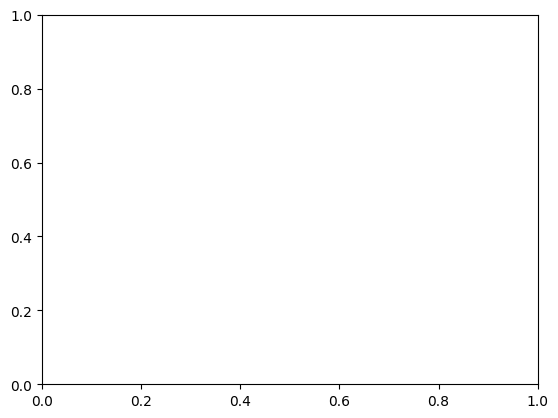

In [557]:
fig, ax = plt.subplots(1)

2. **График 2 * 3**

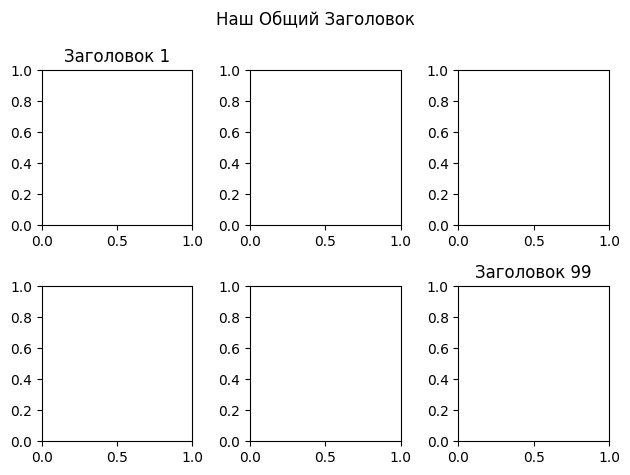

In [559]:
fig, ax = plt.subplots(2, 3)

# поставим общий заголовок
fig.suptitle('Наш Общий Заголовок')

# и подзаголовки
ax[0][0].set_title('Заголовок 1')   # обращаемся к первой картинке по OX и к первой по OY (левая верхняя)
ax[1][2].set_title('Заголовок 99')  # обращаемся ко второй картинке по OX и к третьей по OX (правая нижняя)

plt.tight_layout()
plt.show()

К практике! Вернемся к датасету с диабетом.

Сделаем график 2 * 1 (просто два графика на OX)
- Распределение `ldl`
- Распределение `hdl`

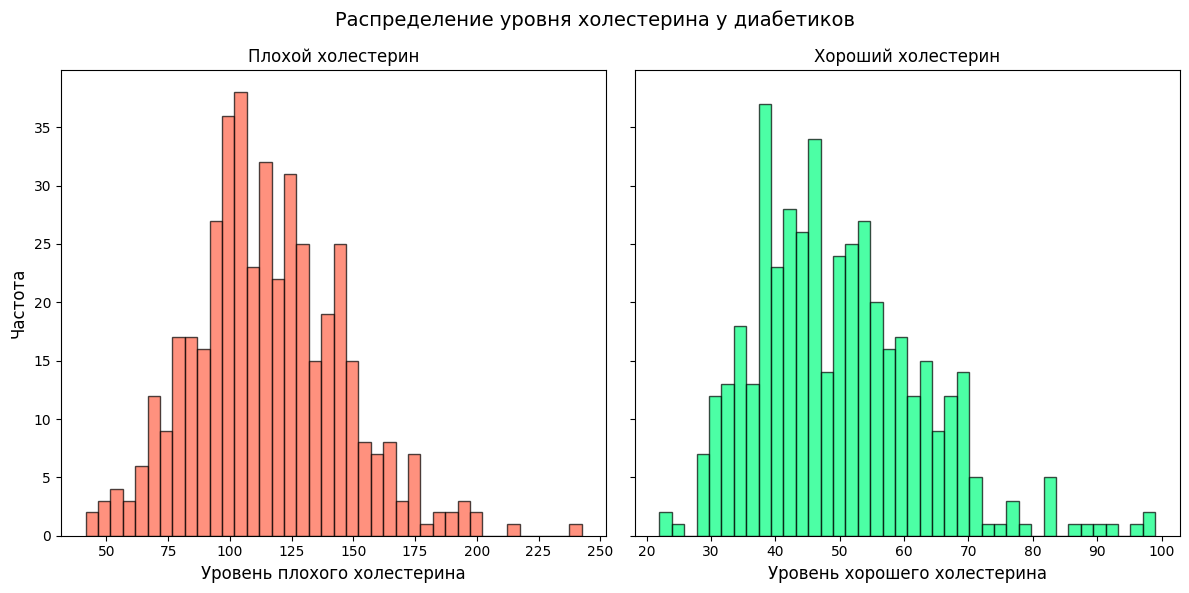

In [580]:
# Делаем каркас: 2 графика по OX. Ось OY для них будет в одной шкале
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

### Распределение плохого холестерина
# График
ax[0].hist(diabetes['ldl'], color='tomato', bins=40, edgecolor='black', alpha=0.7)
# Подписываем заголовок
ax[0].set_title('Плохой холестерин')
# И ось OX
ax[0].set_xlabel('Уровень плохого холестерина', fontsize=12)
# Ось OY также подпишем. Для второго графика это делать не нужно (излишне), так как подфигуры уже разделяют ось
ax[0].set_ylabel('Частота', fontsize=12)

### Распределение хорошего холестерина
ax[1].hist(diabetes['hdl'], color='springgreen', bins=40, edgecolor='black', alpha=0.7)
ax[1].set_title('Хороший холестерин')
ax[1].set_xlabel('Уровень хорошего холестерина', fontsize=12)

# Общий заголовок
fig.suptitle('Распределение уровня холестерина у диабетиков', fontsize=14)

# Выравниваем и отображаем график
plt.tight_layout()
plt.show()

**Более сложный уровень**

Построим график 2*2:
- Верхний левый график - распределение ИМТ (`BMI`) у мужчин и женщин. 
- Верхний правый график - распределение артериального давления (`BP`) у мужчин и женщин. 
- Нижний левый график - распределение липопротеинов низкой плотности (`ldl`) у мужчин и женщин.
- Нижний правый график - распределение уровня глюкозы в крови (`glu`) у мужчин и женщин.

Везде: 
- Мужчины и женщины идут **отдельными**  гистограммами, но на одном подграфике. 
- Цвета выносим в легенду
- Делаем графики прозрачными

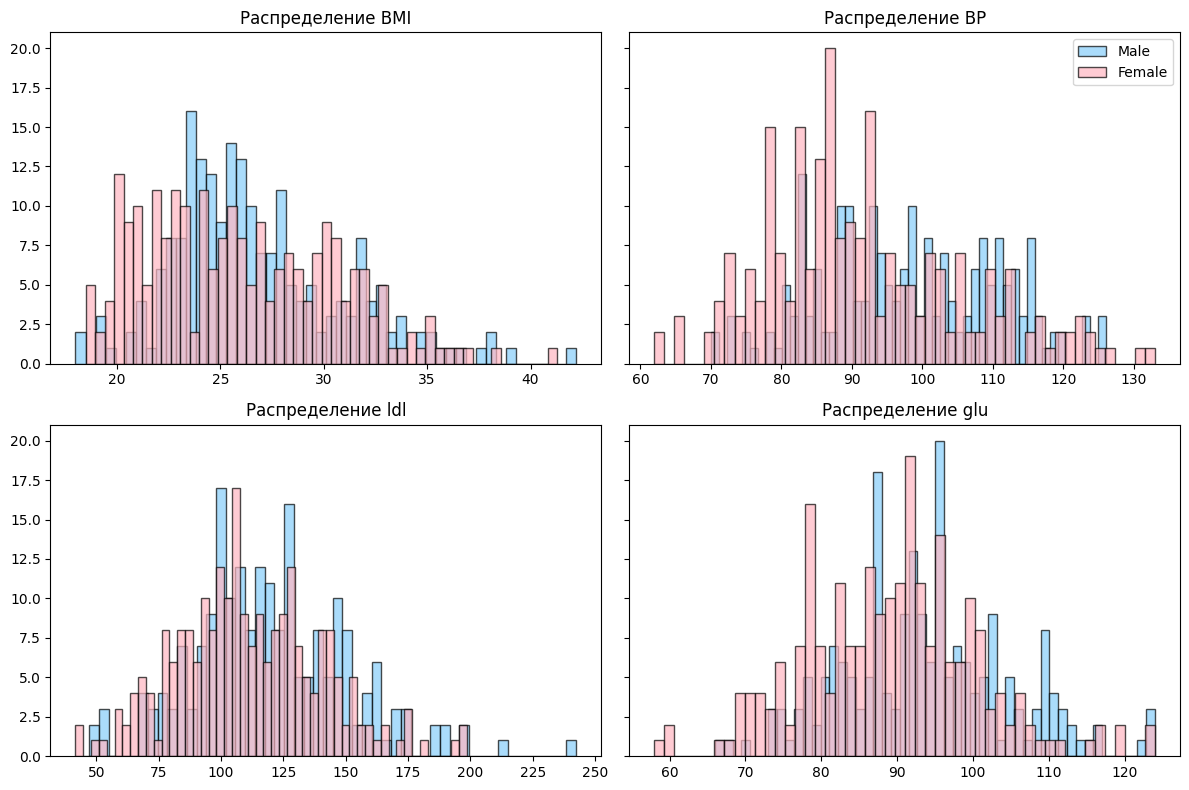

In [589]:
# строим наш каркас размера 2*2. Делаем ось OY одинаковой для ВСЕХ подграфиков
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# Сразу делаем фильтрацию по полу
diabetes_male = diabetes[diabetes.SEX == 'male']
diabetes_female = diabetes[diabetes.SEX == 'female']

# Перечисляем колонки, распределения по которым хотим нарисовать: слева направо, сверху вниз
target_columns = ('BMI', 'BP', 'ldl', 'glu')

# заводим счетчик колонок - чтобы обращаться к нужной колонке
c = 0
# Проходимся по графикам слева направо
for i in range(2):
    # Проходимся по графикам сверху вниз
    for j in range(2):
        target_column = target_columns[c]
        ax[i][j].hist(x = diabetes_male[target_column], label='Male', color='lightskyblue', edgecolor='black', bins=50, alpha=0.7)
        ax[i][j].hist(x = diabetes_female[target_column], label='Female', color='lightpink', edgecolor='black', bins=50, alpha=0.7)
        ax[i][j].set_title(f'Распределение {target_column}')

        # увеличиваем счетчик - переключаемся на другую колонку
        c += 1

# Отображаем легенду - так как она одна у всех подграфиков, можно отобразить только одну из них
ax[0][1].legend()

# Делаем графики не перекрывающимися
plt.tight_layout()